# Import Libraries

In [1]:
!pip install imblearn

   -------------------------------------- 258.0/258.0 kB 145.5 kB/s eta 0:00:00


In [2]:
!pip install pyclustering

     ---------------------------------------- 2.6/2.6 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395106 sha256=84ca14be83fea8d94954868251a8fccf82e0ae1d832884d2d358b2a3df5b2f73
  Stored in directory: c:\users\asty\appdata\local\pip\cache\wheels\e0\56\c2\abb6866a3fcd8a55862f1df8a18f57805c3a78fed9a9023cb9
Successfully built pyclustering


In [3]:
import pandas as pd
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.sparse import csr_matrix

C:\Users\Asty\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Asty\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\Asty\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Read Data

In [4]:
df = pd.read_csv('Tweets.csv')

In [5]:
df.tail()

tweet_id airline_sentiment  airline_sentiment_confidence  \
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence   airline  \
14635                     NaN                     0.0000  American   
14636  Customer Service Issue                     1.0000  American   
14637                     NaN                        NaN  American   
14638  Customer Service Issue                     0.6659  American   
14639                     NaN                     0.0000  American   

      airline_sentiment_gold             name negativereason_gold  \
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
14635         NaN  2015-02-22 12:01:01 -0800            NaN   
14636         NaN  2015-02-22 11:59:46 -0800          Texas   
14637         NaN  2015-02-22 11:59:15 -0800  Nigeria,lagos   
14638         NaN  2015-02-22 11:59:02 -0800     New Jersey   
14639         NaN  2015-02-22 11:58:51 -0800     dallas, TX   

                    user_timezone  
14635                         NaN  
14636                         NaN  
14637                         NaN  
14638  Eastern Time (US & Canada)  
14639                         NaN

# Preprocessing

## Select only text and airline_sentiment

In [6]:
df = df[['text','airline_sentiment']]

In [7]:
df.tail()

text airline_sentiment
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14637  @AmericanAir Please bring American Airlines to...           neutral
14638  @AmericanAir you have my money, you change my ...          negative
14639  @AmericanAir we have 8 ppl so we need 2 know h...           neutral

## Printing all text to observe data

In [8]:
for text in df['text']:
    print(text)

@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it
@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP
@virginamerica Well, I didn't…but NOW I DO! :-D
@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.
@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D
@V

@united what's the hold up with flight 6475 from SLC to DEN??
@united DEN-PHX flight tomorrow Cancelled Flighted. Asked for overnight 2nite in LAX/SNA. Told not without paying. That's wrong
@united can you please follow for a DM?
@united thank you for the help!!
@united Yeah that didn't happen!
@united Why do I still not have my bags? They arrived @10AM &amp;website says they're still at the airport..2 1/2 hours Late Flightr???!! #nothappy
@United had a maintenance issue. Stuck in Geneva with meal voucher that won't even cover a pLate Flight of spaghetti. Really.
@united Hate when I get bumped out of the seat I've selected (&amp; empty row) and moved to another seat (non-empty). #1K #flt803 #nonupgrade!
@united no announcement re extra baggage, "find an empty bin" down to aisle 20 back up with baggage to my seat row 7. YOUR agents argueing
@united bags arrived - I sure miss the customer focused days when I used to fly @ContinentalAir1 Here's hoping @united wakes up
@united Total BS.hav

@SouthwestAir The problem is apologies don't help. Results matter and it's proving impossible to find anyone who is interested in that.
@SouthwestAir no fare giving out clues.  In route now.
@SouthwestAir telling my Fam in Vegas now. :)
@SouthwestAir How many tickets are left?
@SouthwestAir thank you!
@SouthwestAir- is new #MKT strategy to be average like all the rest? #whathappend? RR Points Devalued- AGAIN -http://t.co/mDbDYomrs7
@SouthwestAir do these scavenger hunt  locations have anything in common because I'm playing detective trying to figure out the one for ATL.
@SouthwestAir Why do you have to be 18 😭
@SouthwestAir ruined my Sunday. 3+ hours of delays out of DIA, now my bags are at the wrong airport. $35 to deliver them? Insult to injury.
@SouthwestAir What can we do to bring you back to Jackson, MS?! We miss you terribly around here. These other airlines are horrible!!
@SouthwestAir Any idea why TSA Pre-Check isn't showing for my next flight tomorrow? The number is in my prof

SMH
how sway how “@JetBlue: Our fleet's on fleek. http://t.co/tQc96tKcI9”
um wut “@JetBlue: Our fleet's on fleek. http://t.co/M4UWcPxtXJ”
Alright... Someone has to stop this! RT @JetBlue: Our fleet's on fleek. http://t.co/lchVJoliDg
Stop. Please. RT @JetBlue: Our fleet's on fleek. http://t.co/EUl6sDURbU
@JetBlue SHUT THE DOOR ON YOUR WAY OUT. 🙅
@JetBlue does transferring trueblue points within family pooling members cost $? This is after having set up contribution-to-pool already.
@JetBlue Gotcha... thanks for the update. I'm ready to go whenever you are :) Enjoy your evening.
@JetBlue Our non-profit ARC would love tickets as we rely on airlines for extractions in saving abducted children and returning them Home!
@JetBlue Gotcha... but "lessening the delay" ... that part's not happening, right?
Social agencies, this is why we can't have nice things. @JetBlue: Our fleet's on fleek. http://t.co/QRxz0bGbtq
@JetBlue? | RT @WMCActionNews5: New airline expected to make its way to MEM http://

@JetBlue's CEO Battles to Appease Passengers and Wall Street - http://t.co/frrfxCCw7Z http://t.co/nKlW9SsVRQ
@JetBlue unfortunately no, but hoping I can catch one sometime in the near future!
@JetBlue why is my flight delayed 2.5 hours. This is insane. Every other flight has made it to NYC.
@JetBlue @EllaHenderson Ah! Wish I was there! Good luck!
@JetBlue should i continue?
@JetBlue Ok great thanks! I had a great flight, FYI. I'm excited to fly again. I just was frustrated I was not able to check in.
@JetBlue I do not want to deal with your customer service agents with no practical knowledge.Provide me with a direct contact.
@JetBlue Got flight reschedule to flight form PIT to FLL and our flight had mechanical problems so we were delayed an hour Missed my connect
@JetBlue well lucky I only fly JB..I guess I would be even more squished on any other airline 😞
@JetBlue she was a phone agent, pls do! Peggy was pleasant, informative and delivered. ⭐️⭐️⭐️⭐️⭐️
@JetBlue Hopefully next time! Ca

@USAirways of course! "Yeah, travel has gotten harder. Ask other passengers if they will switch" it's not the fact, it's the attitude!
@USAirways skys r sunny air is cold I can't wait to get to #CLT
@USAirways never imagined it would be so hard to SPEND money through US Air. Stubbornly hoping someone will come back to the phone.
@USAirways found great prices thru US Air for honeymoon. Website wont work and been on hold for more than a hour now after being told 10 min
@USAirways we on on the flight from phf to clt. At the terminal but can't get off plane yet. Need to get on iah flight.
@USAirways can we hold two seats for 11:35 flight from PHX to Las 1856 as this delayed flight 556 is not going to arrive on-time
@USAirways @AmericanAir I'm a chairman who was in 1st class on both my flights today. System Cancelled Flightled my tickets and kicked me out of 1st.
@USAirways I've been on hold for 40 minutes just to get a receipt. I know you guys are busy but I think it's time to higher more 

@AmericanAir Still waiting news about my bags 48hrs already happened and this company don't give to the passengers any certain information
@AmericanAir Your customer service sucks! You rep should not be yelling at a caller regarding the weather in DFW.  Hope you go bankrupt!
@AmericanAir Phone just disconnects if you stay on the line. Need to checkout of hotel in 2 hrs &amp; have no place to go. Can't keep calling.
@AmericanAir do you know if there is wifi on this flight? If so how much is it? Thank you :-)
@AmericanAir no apologies required. I made it home safe thanks to you! Kudos to AA!
@AmericanAir requested a call back at 1am. My Cancelled Flighted flight through DFW shouldn't take this long to reroute. You're Customer Service lacks
@AmericanAir will you review your systems re notification? The website and telephone systems you have in place are clearly inadequate.
@AmericanAir Why not sell MCE during post door-close shuffle in same way u sell drinks/snacks? People on my flight se

## Transform into Lowercase

In [9]:
df['text'] = df['text'].str.lower()
df['text']

0                      @virginamerica what @dhepburn said.
1        @virginamerica plus you've added commercials t...
2        @virginamerica i didn't today... must mean i n...
3        @virginamerica it's really aggressive to blast...
4        @virginamerica and it's a really big bad thing...
                               ...                        
14635    @americanair thank you we got on a different f...
14636    @americanair leaving over 20 minutes late flig...
14637    @americanair please bring american airlines to...
14638    @americanair you have my money, you change my ...
14639    @americanair we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

## Convert emoji to text using demoji

In [10]:
!pip install demoji
import demoji

demoji.download_codes()

C:\Users\Asty\AppData\Local\Temp\ipykernel_411976\3556868172.py:4: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [11]:
df['text'][0]

'@virginamerica what @dhepburn said.'

In [12]:
def replace_emojis(text):
    emojis = demoji.findall(text)
    for emoji, description in emojis.items():
        text = text.replace(emoji, f' {description} ')

    return text

In [13]:
replace_emojis(df['text'][18])

'i  red heart  flying @virginamerica.  smiling face  thumbs up '

In [14]:
df['text'] = df['text'].apply(replace_emojis)

## Removing links

In [15]:
def remove_links(text):
    return re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

df['text'] = df['text'].apply(remove_links)

## Treating stopwords

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df

text airline_sentiment
0                    @virginamerica what @dhepburn said.           neutral
1      @virginamerica plus you've added commercials t...          positive
2      @virginamerica i didn't today... must mean i n...           neutral
3      @virginamerica it's really aggressive to blast...          negative
4      @virginamerica and it's a really big bad thing...          negative
...                                                  ...               ...
14635  @americanair thank you we got on a different f...          positive
14636  @americanair leaving over 20 minutes late flig...          negative
14637  @americanair please bring american airlines to...           neutral
14638  @americanair you have my money, you change my ...          negative
14639  @americanair we have 8 ppl so we need 2 know h...           neutral

[14640 rows x 2 columns]

In [18]:
df['text'] = [nltk.tokenize.word_tokenize(docs) for docs in df['text']]
df

text airline_sentiment
0         [@, virginamerica, what, @, dhepburn, said, .]           neutral
1      [@, virginamerica, plus, you, 've, added, comm...          positive
2      [@, virginamerica, i, did, n't, today, ..., mu...           neutral
3      [@, virginamerica, it, 's, really, aggressive,...          negative
4      [@, virginamerica, and, it, 's, a, really, big...          negative
...                                                  ...               ...
14635  [@, americanair, thank, you, we, got, on, a, d...          positive
14636  [@, americanair, leaving, over, 20, minutes, l...          negative
14637  [@, americanair, please, bring, american, airl...           neutral
14638  [@, americanair, you, have, my, money, ,, you,...          negative
14639  [@, americanair, we, have, 8, ppl, so, we, nee...           neutral

[14640 rows x 2 columns]

In [19]:
df['text'][1]

['@',
 'virginamerica',
 'plus',
 'you',
 "'ve",
 'added',
 'commercials',
 'to',
 'the',
 'experience',
 '...',
 'tacky',
 '.']

In [20]:
nltk.download('stopwords')
all_stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Exclude some words from stopwords. This is a sentiment analysis case. We may need some of these exceptions.

In [21]:
exclude_from_stop = {"not", "no", "never", "none", "isn't", "aren't", "wasn't", "weren't", "doesn't", "don't",
                     "didn't", "won't", "wouldn't", "can't", "couldn't", "shouldn't", "haven't", "hasn't",
                     "hadn't", "mightn't", "mustn't", "but", "if", "because", "as", "though", "although",
                     "until", "while", "against", "under", "over", "into", "through", "before", "after",
                     "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
                     "more", "most", "less", "least", "few", "fewer", "many", "several", "enough", "never",
                     "needn't","shan't",'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn',
                     'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn','don',"n't"}
stopwrds = [word for word in all_stopwords if word not in exclude_from_stop]

additional_stopwords = ["'re", "'s","'ve","'m","'d","'tis","y'all"]
stopwrds.extend(additional_stopwords)

print(stopwrds)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'or', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'during', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ma', "'re", "'s", "'ve", "'m", "'d", "'tis", "y'all"]


Finally, remove the stopwords

In [22]:
def remove_stopwords(text):
    return ' '.join([word for word in text if word not in stopwrds])

df['text'] = df['text'].apply(remove_stopwords)
df

text airline_sentiment
0                      @ virginamerica @ dhepburn said .           neutral
1      @ virginamerica plus added commercials to expe...          positive
2      @ virginamerica n't today ... must mean need t...           neutral
3      @ virginamerica really aggressive to blast obn...          negative
4                   @ virginamerica really big bad thing          negative
...                                                  ...               ...
14635  @ americanair thank got on different flight to...          positive
14636  @ americanair leaving over 20 minutes late fli...          negative
14637  @ americanair please bring american airlines t...           neutral
14638  @ americanair money , change flight , n't answ...          negative
14639  @ americanair 8 ppl need 2 know many seats on ...           neutral

[14640 rows x 2 columns]

## Removing Punctuations

In [23]:
def remove_punctuation(text):
    whitelist = 'a-zA-Z '
    pattern = f"[^{whitelist}]"
    return re.sub(pattern, '', text)

df['text'] = df['text'].apply(remove_punctuation)
df

text airline_sentiment
0                          virginamerica  dhepburn said            neutral
1       virginamerica plus added commercials to exper...          positive
2       virginamerica nt today  must mean need to tak...           neutral
3       virginamerica really aggressive to blast obno...          negative
4                     virginamerica really big bad thing          negative
...                                                  ...               ...
14635   americanair thank got on different flight to ...          positive
14636   americanair leaving over  minutes late flight...          negative
14637   americanair please bring american airlines to...           neutral
14638   americanair money  change flight  nt answer p...          negative
14639   americanair  ppl need  know many seats on nex...           neutral

[14640 rows x 2 columns]

## Lemmatization

In [24]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asty\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asty\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    words = sentence.split()
    pos_tags = nltk.pos_tag(words)
    lemmatized_words = []
    for word, tag in pos_tags:
        wordnet_tag = get_wordnet_pos(tag)
        if wordnet_tag is not None:
            lemmatized_word = lemmatizer.lemmatize(word, pos=wordnet_tag)
        else:
            lemmatized_word = lemmatizer.lemmatize(word)
        lemmatized_words.append(lemmatized_word)
    return ' '.join(lemmatized_words)

df['text'] = df['text'].apply(lemmatize_sentence)

## Manual Checking

In [26]:
for text in df['text']:
    print(text)

virginamerica dhepburn say
virginamerica plus added commercial to experience tacky
virginamerica nt today must mean need to take another trip
virginamerica really aggressive to blast obnoxious entertainment in guest face amp little recourse
virginamerica really big bad thing
virginamerica seriously would pay flight seat nt play really bad thing fly va
virginamerica yes nearly every time fly vx ear worm win go away
virginamerica really miss prime opportunity men without hat parody
virginamerica well didntbut d
virginamerica amaze arrive hour early good to
virginamerica know suicide second lead cause death among teen
virginamerica lt pretty graphic much good minimal iconography
virginamerica great deal already think nd trip to australia amp nt even go on st trip yet p
virginamerica virginmedia fly fabulous seductive sky u take stress away from travel
virginamerica thanks
virginamerica sfopdx schedule still mia
virginamerica excite first cross country flight lax to mco heard nothing but g

united try flight option a per weblink non available next day frustrate notgoodenough poorservice
united ask to dm ignore please assist in change to another flight today feb fra to mco avoid iad
united stay in business poor service poorservice notgoodenough
united airline refuse canadian passport less month remain validity go to u
united time arrive airport domestic flight out san diego
united taxing in ord flyohare airlinegeeks avgeek
united send dm exist reservation but no one respond
united go to service desk to see option
united miss continental day
united next time bag underweight guy credit take business to airline care
united nt full plenty time to go to gate check plus status gotten on
united staff refuse to let on early flight cite check bag
united thanks nothing next time ll bring whole extra suitcase extra pound make sense right
unite first lose bag cancel flight flight home min wait to talk to somebody poorservice notgoodenough
united great landing in denver next rapid city

southwestair flight cancel flight two hour on hold hang up little help thx
southwestair on hold over hour call get disconnected thanks lot
southwestair everything ok rd call day time on hold hr ll hang up try
southwestair hold music need fix certain track loud phone button mash tone in themestimated wait time would help
southwestair on hold hour before disconnect after flight cancel flightled swell company
southwestair weather delay nt fault today but get to hotel two soaked suitcases no dry clothes stink frustrate
southwestair thanks get home from denver tonight despite snow
southwestair u texted flight from denver to sd tmrw cancel flightled on hold hour try to get help flight
southwestair wow minute on hold far phone die
southwestair hire flight attendant right
southwestair never let down
southwestair on hold hour min whats holdup
southwestair wait minute on hold because yall cancel flightled return flight answer phone
southwestair delacy p compassionate professional despite flight 

jetblue yoga tv service seem to down though look forward to much
jetblue w edits dear msbgu mba need good benefit work u meet
jetblue course airplane
jetblue fail answer please nt justify otherwise
jetblue come on already delay hr on flight a waited pilot to come from boston reassign endless trip
jetblue get alert immediately start look to rebook but minute from reflight book problem to catch flight to srq
jetblue fly jet blue
jetblue perhaps need to start recruit msbgu
jetblue start include pto in getaway package in
jetblue thanks use extra time to more shopping somebody say duty free
jetblue flight flight book problem experience pretty great
jetblue still wait to board see if give u exit row
jetblue thanks make trip home mintyfresh next brandmance flight ll take more selfies love travel business
jetblue nt to find tell u flown jet blue since first month experience nt
jetblue if flight delayed show up airport appropriate amount time delay to go on time
jetblue over honestly would like

usairways three hour wait count wait reservation on phone serious
usairways on happy note crew wonderful ca nt say enough great thing pilot u
usairways mess cause computer system flight in hour late flight no gate u est min wait
usairways storm no storm customer service joke hour wait time to speak to someone never fly airline
usairways guy luggage in san jose suppose to deliver to hotel hour ago please contact
usairways fly figured worth mile in lifetime first last ever flight on u airway
usairways pls get back to tallahassee no one ever to strand in gainesville long unamused face
usairways miserable airline loss revenue reflection go extinct merger delay inevitable
usairways point merger not go out business if not turn profit anymore
usairways love to give feedback to link to fill out personal info on form guy best
usairways finally get ahold agent after another hour thanks follow up recommend call back feature
usairways ringling brother barnum bailey keep eye peel clown car
usairway

americanair cost over dollar because flight cancel flightled could nt even give food comp fly jetblue delta take
americanair say dumb thing to beat around bush if flight cancel flightled prepared no compassion from
americanair yes to ios run io
americanair bad company ever please not fly repeat please not fly not credit if delay
americanair continue to win never miss flight before but nice little quiet gate change make possible sheesh
americanair keep aa up in air crew chief cousin alex espinosa in dfw
americanair lose cat miss flight keep crated hr wouldbe hr trip ll never touch pet
americanair nt worry wo nt steal money
americanair continually get put on hold painfully inexperienced people call platinum desk
americanair pretty lame response to two page single space letter
americanair not happen to u matter response matter way to drop ball aa
americanair look help on usairways award travel book wife two boys no seat assign
americanair clarkey do truck no biggie grin face smile eye
ame

# EDA

In [27]:
df.tail()

text airline_sentiment
14635  americanair thank get on different flight to c...          positive
14636  americanair leave over minute late flight no w...          negative
14637  americanair please bring american airline to b...           neutral
14638  americanair money change flight nt answer phon...          negative
14639  americanair ppl need know many seat on next fl...           neutral

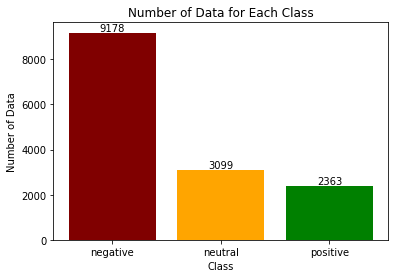

In [28]:
colors = ['maroon', 'orange', 'green']
class_counts = df['airline_sentiment'].value_counts()

fig, ax = plt.subplots()
bars = ax.bar(class_counts.index, class_counts.values,color=colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Number of Data')
ax.set_title('Number of Data for Each Class')

# Show the plot
plt.show()

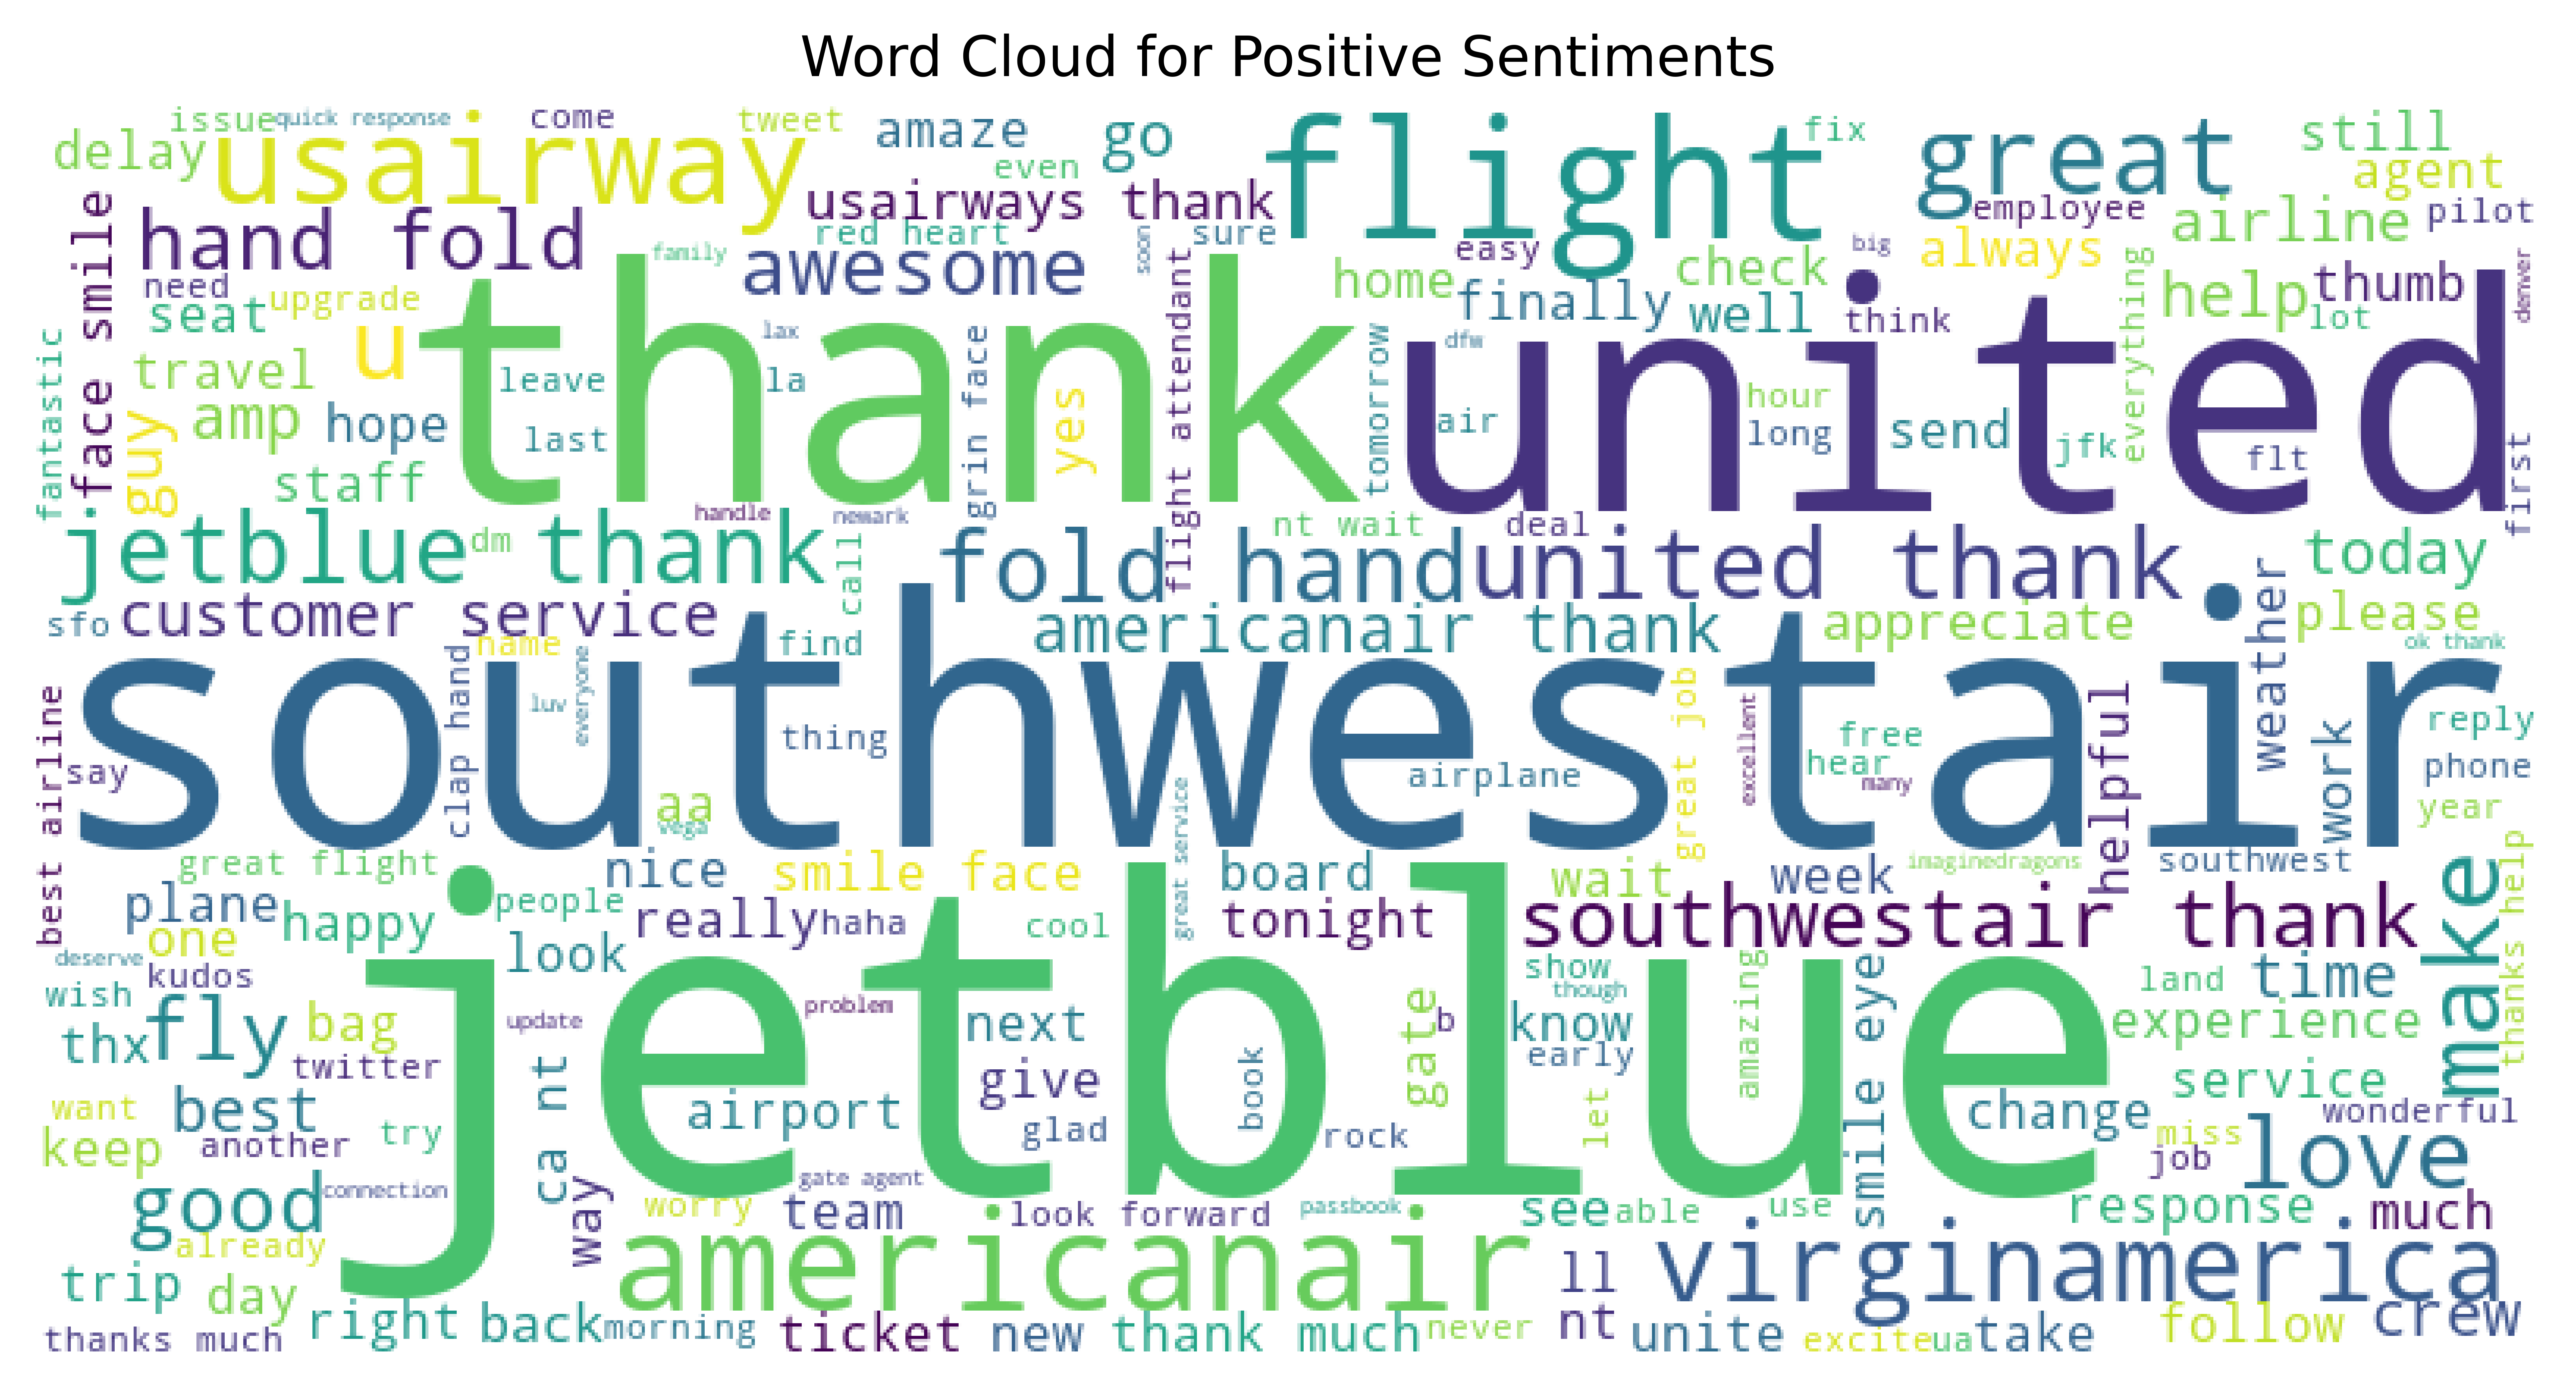

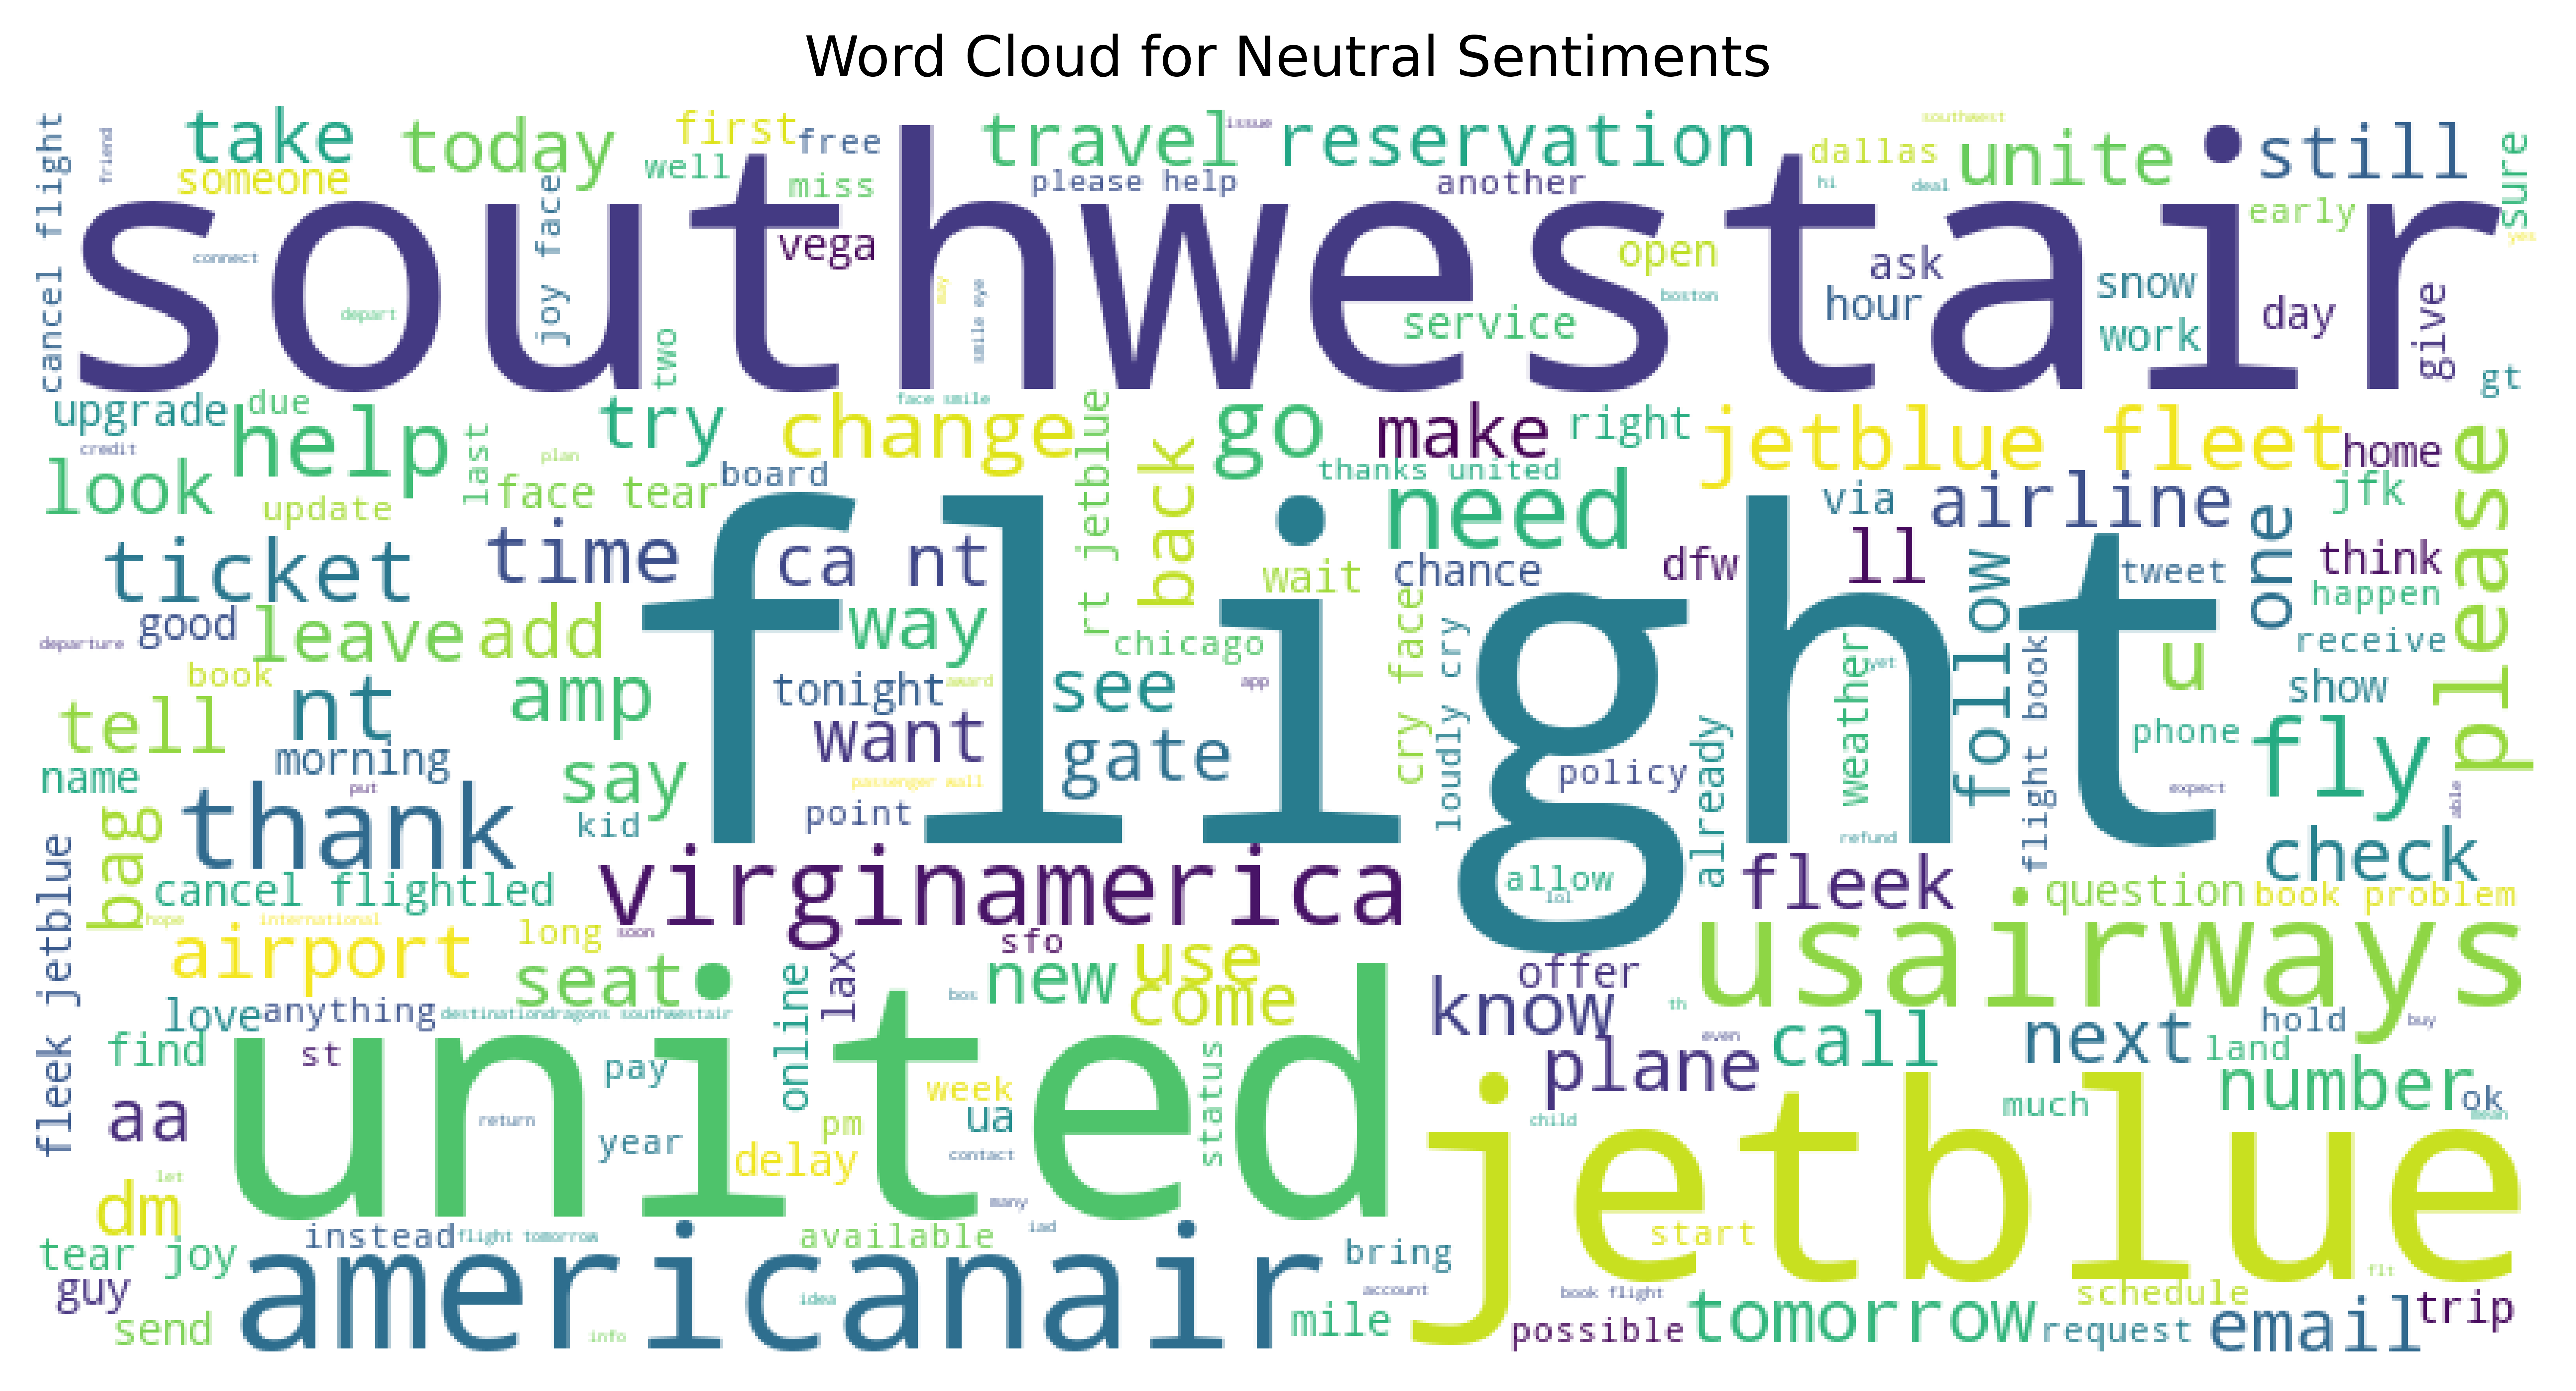

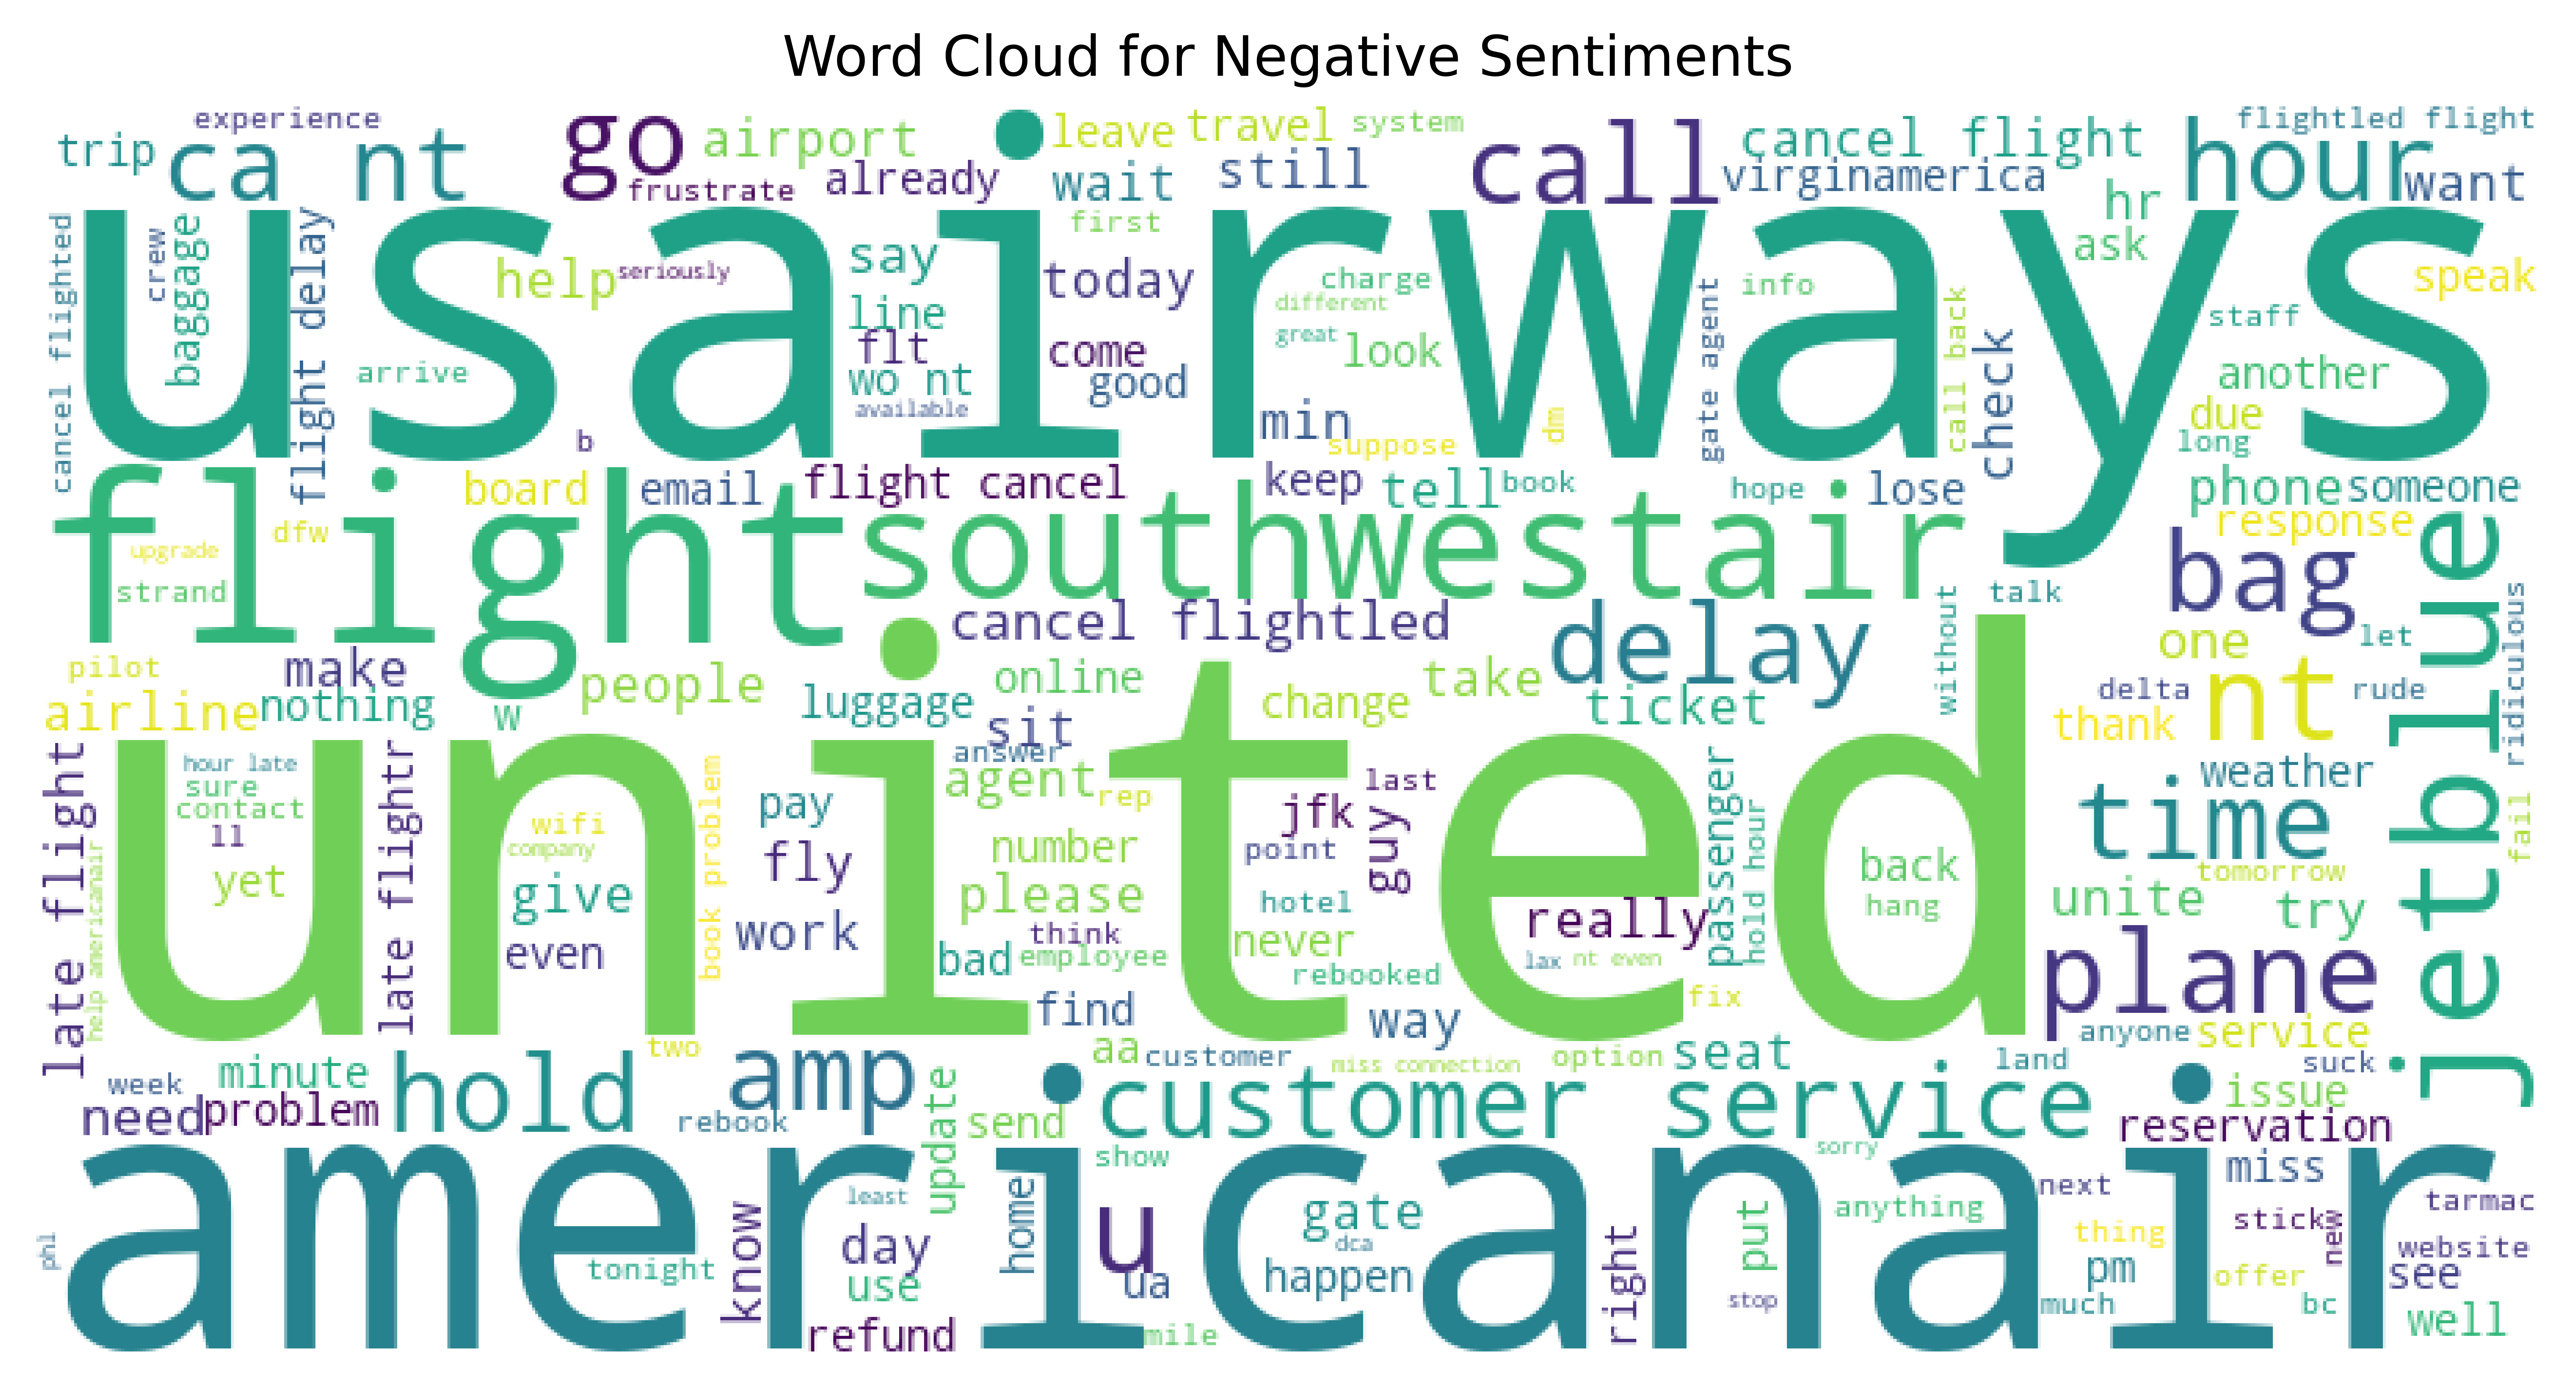

In [29]:
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(data))
    plt.figure(figsize=(10, 5), dpi=1000)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds for each label
for label in ['positive', 'neutral', 'negative']:
    subset = df[df['airline_sentiment'] == label]['text']
    generate_wordcloud(subset, f'Word Cloud for {label.capitalize()} Sentiments')

## Map label into integers

In [30]:
df['airline_sentiment'] = df['airline_sentiment'].replace({'positive': 2, 'neutral': 1, 'negative':0})

C:\Users\Asty\AppData\Local\Temp\ipykernel_411976\1813139062.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['airline_sentiment'] = df['airline_sentiment'].replace({'positive': 2, 'neutral': 1, 'negative':0})


# Data Splitting

In [31]:
RANDOM_SEED = 42
df_train, df_test = train_test_split(df, test_size=0.3, random_state=RANDOM_SEED)

# Applying TFIDF

In [32]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(df_train['text'])
X_test_tfidf = tfidf.transform(df_test['text'])

In [33]:
X_train_tfidf

<10248x9164 sparse matrix of type '<class 'numpy.float64'>'
	with 113871 stored elements in Compressed Sparse Row format>

In [34]:
X_test_tfidf

<4392x9164 sparse matrix of type '<class 'numpy.float64'>'
	with 47217 stored elements in Compressed Sparse Row format>

In [35]:
y_train = df_train['airline_sentiment']
y_test = df_test['airline_sentiment']

# Show data in training

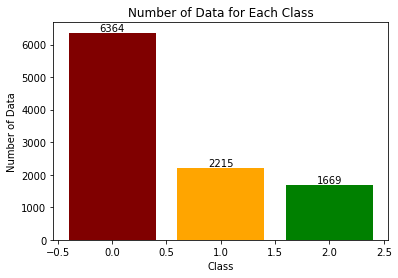

In [36]:
colors = ['maroon', 'orange', 'green']
class_counts = y_train.value_counts()

fig, ax = plt.subplots()
bars = ax.bar(class_counts.index, class_counts.values,color=colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Number of Data')
ax.set_title('Number of Data for Each Class')

# Show the plot
plt.show()

# Show data in testing

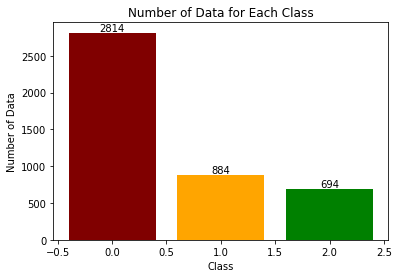

In [37]:
colors = ['maroon', 'orange', 'green']
class_counts = y_test.value_counts()

fig, ax = plt.subplots()
bars = ax.bar(class_counts.index, class_counts.values,color=colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Number of Data')
ax.set_title('Number of Data for Each Class')

# Show the plot
plt.show()

# First Experiment: Using XGBoost

In [38]:
param_grid = {'min_child_weight': [1, 5, 10],
              'gamma': [0, 0.5, 1, 1.5],
              'subsample': [0.3, 0.4, 0.5],
              'colsample_bytree': [0.05, 0.1, 0.15],
              'max_depth': [3, 5, 7]}

# clf = xgb.XGBClassifier()
# clf.fit(X_train_tfidf, y_train)
grid = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=10, refit=True)
grid.fit(X_train_tfidf, y_train)
y_pred = grid.predict(X_test_tfidf)
xgbparams = grid.best_params_
print(xgbparams)

{'colsample_bytree': 0.15, 'gamma': 1, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.5}


In [83]:
clf = xgb.XGBClassifier(**xgbparams)
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

In [84]:
accuracy_xgb_base = accuracy_score(y_test, y_pred)
precision_xgb_base = precision_score(y_test, y_pred, average='macro')
recall_xgb_base = recall_score(y_test, y_pred, average='macro')
f1_xgb_base = f1_score(y_test, y_pred, average='macro')
print('Accuracy: ', accuracy_xgb_base)
print('Precision: ', precision_xgb_base)
print('Recall: ', recall_xgb_base)
print('F1 score: ', f1_xgb_base)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.7862021857923497
Precision:  0.7385103010335307
Recall:  0.6842087602816084
F1 score:  0.7068239829674287
Confusion Matrix:
 [[2559  191   64]
 [ 350  468   66]
 [ 170   98  426]]


# Second Experiment: Base using SVM

In [40]:
# clf = SVC()
# clf.fit(X_train_tfidf, y_train)
# y_pred = text_clf.predict(X_test)

param_grid = {'C': [0.01,0.1,1,10,100],
              'gamma': ['scale','auto'],
              'kernel': ['rbf','linear','poly','sigmoid']}

grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True)

grid.fit(X_train_tfidf, y_train)
y_pred = grid.predict(X_test_tfidf)

svmparams = grid.best_params_
print(svmparams)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [85]:
clf = SVC(**svmparams)
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

In [86]:
accuracy_svm_base = accuracy_score(y_test, y_pred)
precision_svm_base = precision_score(y_test, y_pred, average='macro')
recall_svm_base = recall_score(y_test, y_pred, average='macro')
f1_svm_base = f1_score(y_test, y_pred, average='macro')
print('Accuracy: ', accuracy_svm_base)
print('Precision: ', precision_svm_base)
print('Recall: ', recall_svm_base)
print('F1 score: ', f1_svm_base)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8044171220400729
Precision:  0.760845333999366
Recall:  0.7073334019224164
F1 score:  0.7298630592529639
Confusion Matrix:
 [[2599  162   53]
 [ 339  476   69]
 [ 140   96  458]]


# Oversampling

## SMOTE

In [42]:
smt = SMOTE()
X_train_tfidf_sm, y_train_sm = smt.fit_resample(X_train_tfidf, y_train)
X_train_tfidf_sm

<19092x9164 sparse matrix of type '<class 'numpy.float64'>'
	with 229126 stored elements in Compressed Sparse Row format>

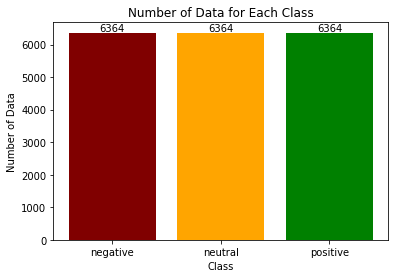

In [43]:
colors = ['maroon', 'orange', 'green']
class_counts = y_train_sm.value_counts()

fig, ax = plt.subplots()
bars = ax.bar(['negative', 'neutral', 'positive'], class_counts.values,color=colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Number of Data')
ax.set_title('Number of Data for Each Class')

# Show the plot
plt.show()

## ADASYN

In [44]:
ada = ADASYN()
X_train_tfidf_ada, y_train_ada = ada.fit_resample(X_train_tfidf, y_train)
X_train_tfidf_ada

<19098x9164 sparse matrix of type '<class 'numpy.float64'>'
	with 240071 stored elements in Compressed Sparse Row format>

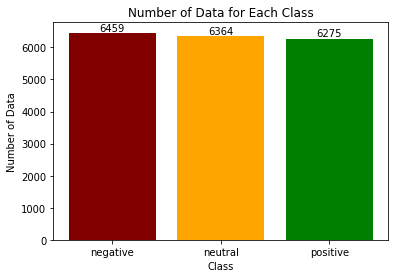

In [45]:
colors = ['maroon', 'orange', 'green']
class_counts = y_train_ada.value_counts()

fig, ax = plt.subplots()
bars = ax.bar(['negative', 'neutral', 'positive'], class_counts.values,color=colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Number of Data')
ax.set_title('Number of Data for Each Class')

# Show the plot
plt.show()

## XGBoost with SMOTE

In [87]:
clf = xgb.XGBClassifier(**xgbparams)
clf.fit(X_train_tfidf_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.15, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [88]:
y_pred = clf.predict(X_test_tfidf)

In [89]:
accuracy_xgb_sm = accuracy_score(y_test, y_pred)
precision_xgb_sm = precision_score(y_test, y_pred, average='macro')
recall_xgb_sm = recall_score(y_test, y_pred, average='macro')
f1_xgb_sm = f1_score(y_test, y_pred, average='macro')
print('Accuracy: ', accuracy_xgb_sm)
print('Precision: ', precision_xgb_sm)
print('Recall: ', recall_xgb_sm)
print('F1 score: ', f1_xgb_sm)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.7802823315118397
Precision:  0.7256523322218064
Recall:  0.7049686324810113
F1 score:  0.7137368990537297
Confusion Matrix:
 [[2450  290   74]
 [ 285  528   71]
 [ 130  115  449]]


## XGBoost with ADASYN

In [90]:
clf = xgb.XGBClassifier(**xgbparams)
clf.fit(X_train_tfidf_ada, y_train_ada)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.15, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [91]:
y_pred = clf.predict(X_test_tfidf)

In [92]:
accuracy_xgb_ada = accuracy_score(y_test, y_pred)
precision_xgb_ada = precision_score(y_test, y_pred, average='macro')
recall_xgb_ada = recall_score(y_test, y_pred, average='macro')
f1_xgb_ada = f1_score(y_test, y_pred, average='macro')
print('Accuracy: ', accuracy_xgb_ada)
print('Precision: ', precision_xgb_ada)
print('Recall: ', recall_xgb_ada)
print('F1 score: ', f1_xgb_ada)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.7766393442622951
Precision:  0.717482961927602
Recall:  0.7004371491326022
F1 score:  0.7077554372333661
Confusion Matrix:
 [[2441  286   87]
 [ 278  529   77]
 [ 139  114  441]]


## SVM with SMOTE

In [93]:
clf = SVC(**svmparams)
clf.fit(X_train_tfidf_sm, y_train_sm)

SVC(C=100)

In [94]:
y_pred = clf.predict(X_test_tfidf)

In [95]:
accuracy_svm_sm = accuracy_score(y_test, y_pred)
precision_svm_sm = precision_score(y_test, y_pred, average='macro')
recall_svm_sm = recall_score(y_test, y_pred, average='macro')
f1_svm_sm = f1_score(y_test, y_pred, average='macro')
print('Accuracy: ', accuracy_svm_sm)
print('Precision: ', precision_svm_sm)
print('Recall: ', recall_svm_sm)
print('F1 score: ', f1_svm_sm)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8030510018214936
Precision:  0.76589095856712
Recall:  0.6993856287804414
F1 score:  0.7264214456047761
Confusion Matrix:
 [[2613  154   47]
 [ 351  476   57]
 [ 156  100  438]]


## SVM with ADASYN

In [96]:
clf = SVC(**svmparams)
clf.fit(X_train_tfidf_ada, y_train_ada)

SVC(C=100)

In [97]:
y_pred = clf.predict(X_test_tfidf)

In [98]:
accuracy_svm_ada = accuracy_score(y_test, y_pred)
precision_svm_ada = precision_score(y_test, y_pred, average='macro')
recall_svm_ada = recall_score(y_test, y_pred, average='macro')
f1_svm_ada = f1_score(y_test, y_pred, average='macro')
print('Accuracy: ', accuracy_svm_ada)
print('Precision: ', precision_svm_ada)
print('Recall: ', recall_svm_ada)
print('F1 score: ', f1_svm_ada)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.7975865209471766
Precision:  0.7560087808165891
Recall:  0.6881658123754558
F1 score:  0.7153610976587471
Confusion Matrix:
 [[2617  151   46]
 [ 362  459   63]
 [ 156  111  427]]


# Undersampling

## TomekLinks

In [58]:
tomek = TomekLinks()
X_train_tfidf_tm, y_train_tm = tomek.fit_resample(X_train_tfidf, y_train)
X_train_tfidf_tm

<9692x9164 sparse matrix of type '<class 'numpy.float64'>'
	with 108965 stored elements in Compressed Sparse Row format>

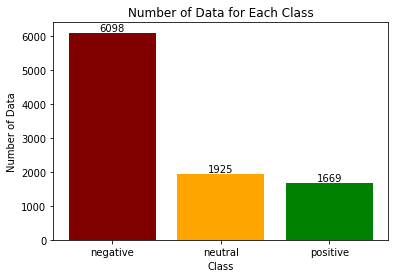

In [59]:
colors = ['maroon', 'orange', 'green']
class_counts = y_train_tm.value_counts()

fig, ax = plt.subplots()
bars = ax.bar(['negative', 'neutral', 'positive'], class_counts.values,color=colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Number of Data')
ax.set_title('Number of Data for Each Class')

# Show the plot
plt.show()

## Clustering Based

In [60]:
from sklearn.metrics import silhouette_score

max_clusters = 150
# Filter only the majority class samples
X_majority = X_train_tfidf[y_train == 0]

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_majority)  # Cluster only majority class samples
    silhouette_avg = silhouette_score(X_majority, cluster_labels)
    silhouette_scores.append(silhouette_avg)

Optimal number of clusters based on silhouette score: 66


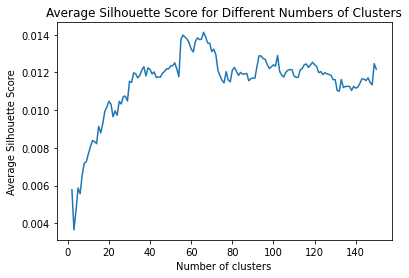

In [61]:
# Find the optimal number of clusters

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to start counting from 2 clusters

print("Optimal number of clusters based on silhouette score:", optimal_num_clusters)


plt.plot(range(2, max_clusters + 1), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score for Different Numbers of Clusters')
plt.show()


In [62]:
from imblearn.under_sampling import ClusterCentroids
y_train_str = y_train.astype(str)
undersampler = ClusterCentroids(sampling_strategy='majority',estimator=KMeans(n_clusters=optimal_num_clusters))
X_train_tfidf_cc, y_train_cc_str = undersampler.fit_resample(X_train_tfidf, y_train_str)
y_train_cc = y_train_cc_str.astype(int)

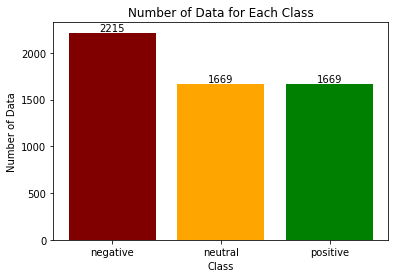

In [63]:
colors = ['maroon', 'orange', 'green']
class_counts = y_train_cc.value_counts()

fig, ax = plt.subplots()
bars = ax.bar(['negative', 'neutral', 'positive'], class_counts.values,color=colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Number of Data')
ax.set_title('Number of Data for Each Class')

# Show the plot
plt.show()

## XGBoost with TomekLinks

In [99]:
clf = xgb.XGBClassifier(**xgbparams)
clf.fit(X_train_tfidf_tm, y_train_tm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.15, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [100]:
y_pred = clf.predict(X_test_tfidf)

In [101]:
accuracy_xgb_tm = accuracy_score(y_test, y_pred)
precision_xgb_tm = precision_score(y_test, y_pred, average='macro')
recall_xgb_tm = recall_score(y_test, y_pred, average='macro')
f1_xgb_tm = f1_score(y_test, y_pred, average='macro')
print('Accuracy: ', accuracy_xgb_tm)
print('Precision: ', precision_xgb_tm)
print('Recall: ', recall_xgb_tm)
print('F1 score: ', f1_xgb_tm)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.7905282331511839
Precision:  0.7444958133288374
Recall:  0.6887805608009892
F1 score:  0.7111940028492311
Confusion Matrix:
 [[2581  162   71]
 [ 377  435   72]
 [ 160   78  456]]


## XGBoost with ClusterCentroids

In [102]:
clf = xgb.XGBClassifier(**xgbparams)
clf.fit(X_train_tfidf_cc, y_train_cc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.15, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [103]:
y_pred = clf.predict(X_test_tfidf)

In [104]:
accuracy_xgb_cc = accuracy_score(y_test, y_pred)
precision_xgb_cc = precision_score(y_test, y_pred, average='macro')
recall_xgb_cc = recall_score(y_test, y_pred, average='macro')
f1_xgb_cc = f1_score(y_test, y_pred, average='macro')
print('Accuracy: ', accuracy_xgb_cc)
print('Precision: ', precision_xgb_cc)
print('Recall: ', recall_xgb_cc)
print('F1 score: ', f1_xgb_cc)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.7067395264116576
Precision:  0.6687635346885498
Recall:  0.7162494606394786
F1 score:  0.6740362191249983
Confusion Matrix:
 [[1953  697  164]
 [ 130  658   96]
 [  57  144  493]]


## SVM with TomekLinks

In [105]:
clf = SVC(**svmparams)
clf.fit(X_train_tfidf_tm, y_train_tm)

SVC(C=100)

In [106]:
y_pred = clf.predict(X_test_tfidf)

In [107]:
accuracy_svm_tm = accuracy_score(y_test, y_pred)
precision_svm_tm = precision_score(y_test, y_pred, average='macro')
recall_svm_tm = recall_score(y_test, y_pred, average='macro')
f1_svm_tm = f1_score(y_test, y_pred, average='macro')
print('Accuracy: ', accuracy_svm_tm)
print('Precision: ', precision_svm_tm)
print('Recall: ', recall_svm_tm)
print('F1 score: ', f1_svm_tm)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8025956284153005
Precision:  0.759489362363435
Recall:  0.701105875702253
F1 score:  0.7237729358310044
Confusion Matrix:
 [[2619  137   58]
 [ 375  429   80]
 [ 140   77  477]]


## SVM with ClusterCentroids

In [108]:
clf = SVC(**svmparams)
clf.fit(X_train_tfidf_cc, y_train_cc)

SVC(C=100)

In [109]:
y_pred = clf.predict(X_test_tfidf)

In [110]:
accuracy_svm_cc = accuracy_score(y_test, y_pred)
precision_svm_cc = precision_score(y_test, y_pred, average='macro')
recall_svm_cc = recall_score(y_test, y_pred, average='macro')
f1_svm_cc = f1_score(y_test, y_pred, average='macro')
print('Accuracy: ', accuracy_svm_cc)
print('Precision: ', precision_svm_cc)
print('Recall: ', recall_svm_cc)
print('F1 score: ', f1_svm_cc)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.7370218579234973
Precision:  0.6899743296539423
Recall:  0.7331917411465425
F1 score:  0.6988951391815647
Confusion Matrix:
 [[2085  593  136]
 [ 138  650   96]
 [  60  132  502]]
